### Chapter Conclusions Thesis

In [1]:
%load_ext autoreload
%autoreload 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from Wind.Results import DBResults
from Wind.Private.DBConfig import mongoremote,mongolocal,mongolocaltest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pprint
import json

### Relationship depth and accuracy

([<matplotlib.axis.XTick at 0x1f3fbec0a20>,
 <a list of 8 Text xticklabel objects>)

Text(0.5, 0, 'Layers')

Text(0, 0.5, 'Accuracy Cummulated $R^2$')

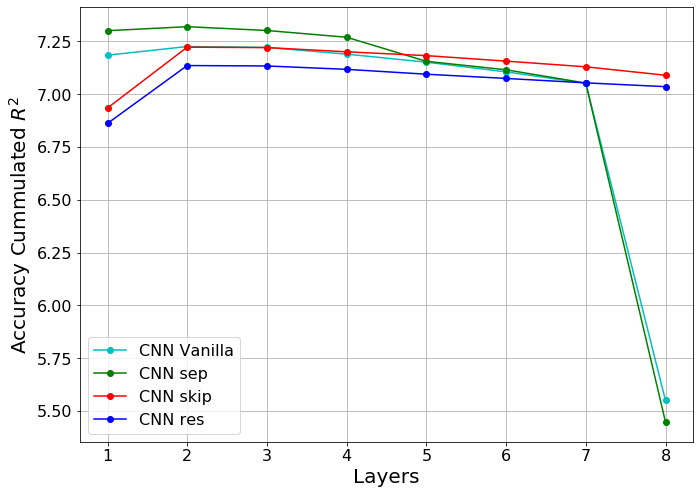

In [5]:
# plt.rcParams.update({'font.size': 20}) This works for all
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

layers = np.array([1, 2, 3, 4, 5, 6, 7, 8])

y_stack = np.row_stack(([7.185, 7.226, 7.222, 7.190, 7.152, 7.106, 7.052, 5.55], 
                        [7.301, 7.320, 7.302, 7.270, 7.156, 7.116, 7.053, 5.448], 
                        [6.935, 7.223, 7.221, 7.201, 7.183, 7.157, 7.130, 7.090], 
                        [6.862, 7.136, 7.134, 7.118, 7.095, 7.075, 7.054, 7.036])) 
# 5.449



fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(layers, y_stack[0,:], label='CNN Vanilla', color='c', marker='o')
ax1.plot(layers, y_stack[1,:], label='CNN sep', color='g', marker='o')
ax1.plot(layers, y_stack[2,:], label='CNN skip', color='r', marker='o')
ax1.plot(layers, y_stack[3,:], label='CNN res', color='b', marker='o')

plt.xticks(layers)
plt.xlabel('Layers')
plt.ylabel('Accuracy Cummulated $R^2$')
handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='lower left')
ax1.grid('on')


plt.savefig('e:/$Notebooks/accuracy_depth.pdf')

Text(0.1, 2.418, 'persistence')

Text(2.1, 6.482, 'RF')

Text(2.1, 4.38, 'k-NN')

Text(3.1, 6.6000000000000005, 'MLP-dirreg')

Text(4.1, 6.904, 'MLP MIMO')

Text(2.1, 6.776, 'MLP rec')

Text(2.1, 6.8790000000000004, 'MLP cas')

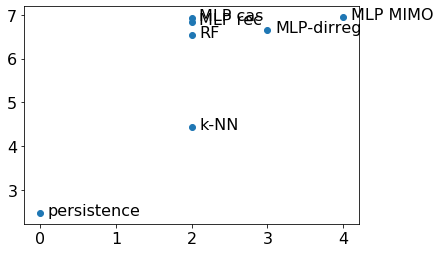

In [19]:
z = [0,2,2,3,4,2,2]
y = [2.468, 6.532, 4.43, 6.65, 6.954, 6.826, 6.929]



n = ['persistence', 'RF', 'k-NN', 'MLP-dirreg', 'MLP MIMO', 'MLP rec', 'MLP cas']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+0.1, y[i]-0.05))

### comparison different distributions

In [5]:
def comparison_distribution_plots(q1 , q2 ,label_q1=None, label_q2 = None ,title='dist plot', save = None, saveformat='png'):

   query1 = {"experiment": q1,"status":"done"}
   query2 = {"experiment": q2,"status":"done"}
   results = DBResults(conn=mongolocal)
   figsize_param=(1200, 800)
   plt.rc('figure', figsize=(10.0, 10.0))
   results.results_dataframe_retrieve(query1)

   df1 = results.exp_df
   results.results_dataframe_retrieve(query2)
   df2 = results.exp_df


   df1_list = list(df1.groupby('site')['test'].sum())
   df2_list = list(df2.groupby('site')['test'].sum())

   data = []
   labels = []
   data.append(df1_list)
   data.append(df2_list)

   labels.append(label_q1)
   labels.append(label_q2)
   colors = ['green', 'orange']

   fig, ax1 = plt.subplots()

   for v,l,c in zip(data, labels, colors):
      sns.distplot(v, label=l, kde=True, norm_hist=True,color=c ,ax = ax1)
      plt.legend(labels=labels, title=title)

   ax1.set_ylabel('Density')
   ax1.set_xlabel(r'$\sum_{i=1}^{12}R^2$')
   if save is not None:
      plt.savefig(f"{save}.{saveformat}", format=saveformat)

   plt.show()

   for v ,l in zip(data, labels):
      print(f'MEAN ({l})= {np.mean(v)}')
      print(f'StDev ({l})= {np.std(v)}')

   return


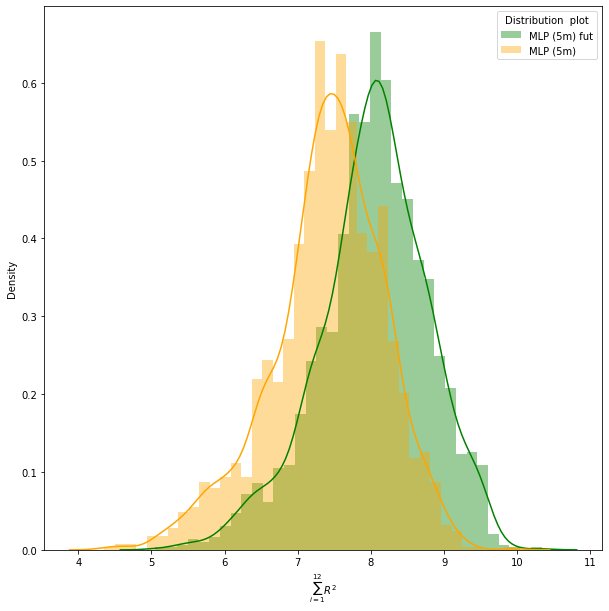

MEAN (MLP (5m) fut)= 8.02550984976425
StDev (MLP (5m) fut)= 0.7535906182315589
MEAN (MLP (5m))= 7.408763509128266
StDev (MLP (5m))= 0.7749011931787776


In [6]:
a = "JM_MLP_5m_12h_fut"
b = "JM_MLP_5m_12h"

comparison_distribution_plots(a, b , label_q1='MLP (5m) fut', label_q2='MLP (5m)', title='Distribution  plot', save = 'dist_comparison_5m_MLP_fut', saveformat='png')

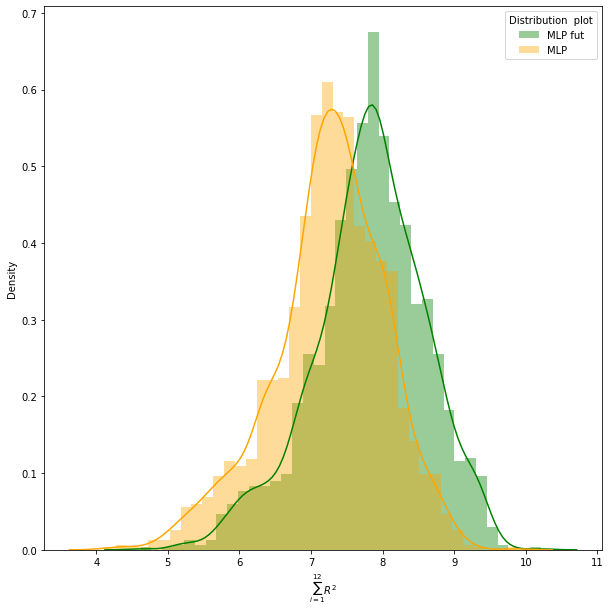

MEAN (MLP fut)= 7.806734885214624
StDev (MLP fut)= 0.7846854959994536
MEAN (MLP)= 7.253844933539594
StDev (MLP)= 0.7921884840690844


In [7]:
a = "JM_MLP_s2s_fut"
b = "JM_MLP_s2s_best"

comparison_distribution_plots(a, b , label_q1='MLP fut', label_q2='MLP', title='Distribution  plot', save = 'dist_comparison_1h_MLP_fut', saveformat='png')